# Depreciation rates

Setup

In [1]:
# Apply magic
%load_ext autoreload
%autoreload 2

# import packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#!pip install git+https://github.com/Kristianuruplarsen/pydst.git

os.chdir('..')
from src.visualization.visualize import plot_delta

### 1. Get data

I extract data on capital and investments from DST's NABK69 tabel. I store the data locally such that the output results always can be retracked back to its source data. 

I call the function data.extract() to extract the data and data.transform() transform data. See source code in src.data folder.

In [2]:
from src.data.extract import extract
extract()

In [3]:
from src.data.transform import transform
transform()

I load the data into memory

In [4]:
K = pd.read_csv('data/processed/NABK69_K.csv', index_col=['BRANCHE','TID','AKTIV'], usecols=['BRANCHE','TID','AKTIV','Current prices'])
I = pd.read_csv('data/processed/NABK69_I.csv', index_col=['BRANCHE','TID','AKTIV'], usecols=['BRANCHE','TID','AKTIV','Current prices'])

### 2. Inspect data

Inspect data structure

In [5]:
K

Current prices
BRANCHE TID  AKTIV                
bol     1993 B             1364715
             M                3592
        1994 B             1395313
             M                3904
        1995 B             1432362
...                            ...
udv     2016 M               37185
        2017 B               67458
             M               35118
        2018 B               68057
             M               34241

[468 rows x 1 columns]

In [6]:
I

Current prices
BRANCHE TID  AKTIV                
bol     1993 B             30531.0
             M               782.0
        1994 B             34912.0
             M              1006.0
        1995 B             39782.0
...                            ...
udv     2016 M              3232.0
        2017 B              1414.0
             M              1309.0
        2018 B              2707.0
             M              1712.0

[468 rows x 1 columns]

Inspect descriptive statistics for different sectors

In [7]:
K.groupby(['BRANCHE','AKTIV']).describe()

Current prices                                          \
                       count          mean            std        min   
BRANCHE AKTIV                                                          
bol     B               26.0  2.202955e+06  562541.528567  1364715.0   
        M               26.0  6.681038e+03    2034.074974     3592.0   
byg     B               26.0  1.958177e+04    5865.854354    10809.0   
        M               26.0  2.746435e+04    4147.962092    18480.0   
ene     B               26.0  1.910479e+05   41774.607099   119134.0   
        M               26.0  2.748873e+04   12458.414004    15163.0   
fre     B               26.0  1.581430e+05   40426.049925    91904.0   
        M               26.0  2.234630e+05   48867.947967   141493.0   
lan     B               26.0  1.402148e+05   14902.854731   111721.0   
        M               26.0  6.101323e+04    5078.358446    54488.0   
off     B               26.0  5.006983e+05   96626.015331   357057.0   
        M               26.0  2.351029e+05   63923.475474   125836.0   
soe     B               26.0  1.057192e+04    6608.592201     2277.0   
        M               26.0  1.021286e+05   31341.474125    57491.0   
tje     B               26.0  7.074600e+05  162081.650387   444063.0   
        M               26.0  3.885828e+05   95952.416668   226055.0   
udv     B               26.0  4.631562e+04   18014.394835    16258.0   
        M               26.0  2.596404e+04    5994.335202    18795.0   

                                                             
                      25%        50%         75%        max  
BRANCHE AKTIV                                                
bol     B      1738218.00  2209564.0  2622532.50  3202050.0  
        M         4670.75     7020.5     7996.50    10546.0  
byg     B        14117.00    19980.5    24223.00    30088.0  
        M        25080.00    28770.0    30364.50    34003.0  
ene     B       156718.50   193334.5   227149.25   261434.0  
        M        17268.50    22255.0    33174.00    52715.0  
fre     B       122528.25   162326.0   189344.50   229046.0  
        M       185825.50   222423.0   263913.25   306375.0  
lan     B       126976.75   147199.0   151359.75   161800.0  
        M        56933.25    58173.5    66175.75    70210.0  
off     B       418281.00   510523.5   584705.25   672505.0  
        M       187363.25   235768.5   290632.75   332594.0  
soe     B         4179.75    11722.0    16721.75    19754.0  
        M        71489.25   100374.5   121007.25   158344.0  
tje     B       556461.00   745034.0   838625.50   951188.0  
        M       308351.00   393580.5   462702.00   558143.0  
udv     B        29592.50    50422.5    61866.50    68057.0  
        M        20966.25    24227.0    29542.25    38051.0

In [8]:
I.groupby(['BRANCHE','AKTIV']).describe()

Current prices                                                 \
                       count          mean           std      min       25%   
BRANCHE AKTIV                                                                 
bol     B               26.0  72158.615385  23838.969268  30531.0  55023.25   
        M               26.0   1540.384615    535.753009    782.0   1220.00   
byg     B               26.0   1072.769231    561.776846     79.0    727.75   
        M               26.0   4751.115385    849.909375   3238.0   4156.25   
ene     B               26.0   8226.423077   2874.067587   5275.0   6515.25   
        M               26.0   4025.423077   2572.762844   1269.0   1905.00   
fre     B               26.0   7642.730769   2511.835704   3388.0   6029.75   
        M               26.0  38790.769231  11284.051582  19059.0  31818.25   
lan     B               26.0   3839.192308   1342.122588   1885.0   3029.50   
        M               26.0   6197.115385   1415.326742   3918.0   5313.50   
off     B               26.0  20765.769231   8132.596625   9296.0  13535.25   
        M               26.0  28807.846154   8121.353004  17353.0  22213.00   
soe     B               26.0    894.923077   1324.476377   -205.0    191.50   
        M               26.0  11237.461538   5057.338693   2451.0   7239.75   
tje     B               26.0  32435.923077   7597.595009  18894.0  29153.25   
        M               26.0  76664.884615  20395.268073  38217.0  64923.25   
udv     B               26.0   3468.615385   1186.756557   1414.0   2568.75   
        M               26.0   2929.115385   1431.255402   1309.0   1957.75   

                                            
                   50%       75%       max  
BRANCHE AKTIV                               
bol     B      71649.0  86932.75  113585.0  
        M       1467.0   1848.25    2808.0  
byg     B       1021.5   1362.25    2442.0  
        M       4539.5   5238.50    6852.0  
ene     B       7316.5   8219.25   15616.0  
        M       3644.5   4975.25   12396.0  
fre     B       7272.5   9743.75   11743.0  
        M      36419.0  47352.75   61390.0  
lan     B       3511.0   4430.25    7568.0  
        M       5863.0   6429.50   10153.0  
off     B      20315.5  28404.75   33559.0  
        M      26628.0  36674.50   42177.0  
soe     B        352.5    977.50    5914.0  
        M      11005.5  14387.50   23618.0  
tje     B      31227.5  36775.50   48349.0  
        M      77721.5  89778.00  119527.0  
udv     B       3428.0   4346.50    6206.0  
        M       2545.5   3220.75    7362.0

### Create depreciation rates

Create data on depreciation rates

In [9]:
# Create delta
K_next = K.groupby(['BRANCHE','AKTIV']).shift(-1)
K_diff = K_next - K 
delta = (I - K_diff) / K * 100

# Reshape
delta = delta.pivot_table(index=['BRANCHE','TID'],columns=['AKTIV'], values='Current prices')

Inspect delta for different sectors

In [10]:
delta.groupby('BRANCHE').describe()

AKTIV       B                                                                \
        count      mean        std        min       25%       50%       75%   
BRANCHE                                                                       
bol      25.0 -0.309895   3.927973  -6.130607 -1.653725 -0.683368  0.038758   
byg      25.0  0.974530   4.758204  -8.070080 -1.480325  0.374856  3.812913   
ene      25.0  1.071255   2.128981  -2.820601  0.023198  1.061275  1.848595   
fre      25.0  1.059941   2.609491  -3.224647 -0.526456  0.603760  2.229830   
lan      25.0  1.576769   2.547321  -1.952890 -0.105522  1.607547  2.335663   
off      25.0  1.465504   2.165204  -3.017624  0.444497  1.329436  2.509529   
soe      25.0 -1.138917  15.212096 -46.690457 -2.871427  1.414927  3.637882   
tje      25.0  1.541596   2.122905  -2.276819  0.332755  0.934261  2.707613   
udv      25.0  2.504306   3.400297  -4.552614  0.194942  2.835769  4.834067   

AKTIV                  M                                             \
               max count       mean       std        min        25%   
BRANCHE                                                               
bol      16.719939  25.0  20.055592  5.178744  11.539829  16.452830   
byg      10.225597  25.0  15.578163  3.092055   9.594993  13.192316   
ene       6.097288  25.0   9.055610  6.635602 -10.051107   5.671280   
fre       9.248896  25.0  13.891858  2.460242   9.709916  12.231634   
lan       8.038769  25.0   9.495436  2.732728   2.955375   8.084831   
off       5.191555  25.0   8.305374  1.984382   5.255557   6.562392   
soe      21.765457  25.0   7.061787  5.269507  -3.772704   3.028526   
tje       7.417686  25.0  15.935302  2.183794  11.121630  14.789917   
udv       7.298781  25.0   9.054072  4.372932   0.991704   6.045026   

AKTIV                                     
               50%        75%        max  
BRANCHE                                   
bol      19.635628  24.421629  31.822492  
byg      16.309094  17.907676  20.518387  
ene       8.445118  13.529957  25.684322  
fre      13.676395  16.037933  18.490165  
lan       9.394878  11.173165  15.211762  
off       8.897061   9.964139  11.126461  
soe       7.919865  10.710317  19.329210  
tje      15.783649  17.305448  21.299949  
udv       9.444418  11.879372  17.176341

### 4. Visualize depreciation rates

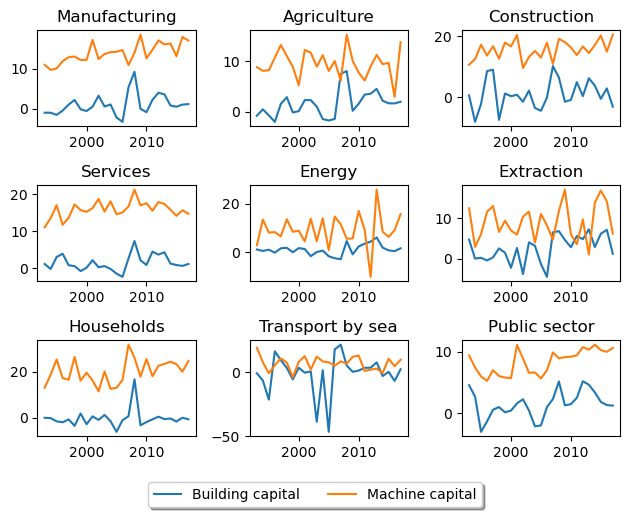

In [11]:
plot_delta(delta)

From the figure above it is apparent that the depreciation rate for Machine capital in general is higher than the depreciation rate for building capital. It is also aparent that there are big differences in the depreciation rates across sectors. There doesn't seem to be any trends in the depreciation rates.